In [1]:
import pandas as pd
import numpy as np
import os
import sys

In [2]:
sys.path.append(os.path.abspath("../finance-ml-mod1"))

In [3]:
import risk_kit as erk

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
ind = erk.get_ind_returns()

/Users/nicholasflores/Documents/GitHub/data-science-python/finance-ml/finance-ml-mod1/risk_kit.py:156: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("../finance-ml-data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100


In [6]:
er = erk.annualize_rets(ind["1996":"2000"],12)

In [7]:
cov = ind["1996":"2000"].cov()

In [10]:
def plot_ef2(npoints, er, cov, style=".-"):
    """
    Plots the N-asset efficient frontier
    """
    weights = minimize_vol(target_return)
    rets = [portfolio_return(w,er) for w in weights]
    vols = [portfolio_vol(w,cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets,
        "Volatility": vols
    })
    return ef.plot.line(x="Volatility", y="Returns", style=style, ylabel="Returns")

In [13]:
# How do we define a function that does the following:
# minimize_vol(target_return)

In [11]:
from scipy.optimize import minimize

In [16]:
l = ["Games", "Fin"]

<Axes: xlabel='Volatility', ylabel='Returns'>

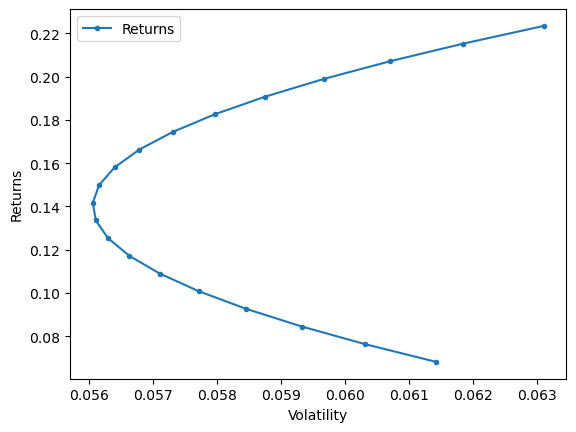

In [17]:
deerk.plot_ef2(20, er[l], cov.loc[l,l])

In [22]:
def target_is_met(w,er):
    """
    determines if the target return is met
    """
    return target_return - erk.portfolio_returns(w, er)

In [31]:
def minimize_vol(target_return, er, cov):
    """
    Takes target_return as an input and returns a weight vector that minimizes the
    volatility
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n,n)
    bounds = ((0.0, 1.0),)*n #makes n copies of a tuple or list when you multiply by n
    return_is_target = {
        'type': 'eq',
        'args': (er,),
        'fun': lambda weights, er: target_return - erk.portfolio_return(weights, er)
    }
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    results = minimize(erk.portfolio_vol,
                       init_guess,
                       args=(cov,),
                       method="SLSQP",
                       options = {'disp': False},
                       constraints = (return_is_target, weights_sum_to_1),
                       bounds = bounds
                      )
    return results.x

In [38]:
w15 = erk.minimize_vol(0.15, er[l],cov.loc[l,l])
vol15 = erk.portfolio_vol(w15,cov.loc[l,l])
vol15

0.056163669406706564

In [36]:
w15

array([0.47287631, 0.52712369])

In [ ]:
erk

In [44]:
def optimal_weights(n_points,er,cov):
    """
    list of weights to run the optimizer on to minimize the volatility
    """
    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs] 
    return weights

In [59]:
def plot_ef(npoints, er, cov, style=".-"):
    """
    Plots the multi-assest efficient frontier
    """
    weights = optimal_weights(npoints, er, cov)
    rets = [erk.portfolio_return(w,er) for w in weights]
    vols = [erk.portfolio_vol(w,cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets,
        "Volatility": vols
    })
    return ef.plot.line(x="Volatility", y="Returns", style=style, ylabel="Returns")

In [60]:
asset_list = ["Smoke","Fin","Games","Coal"]

<Axes: xlabel='Volatility', ylabel='Returns'>

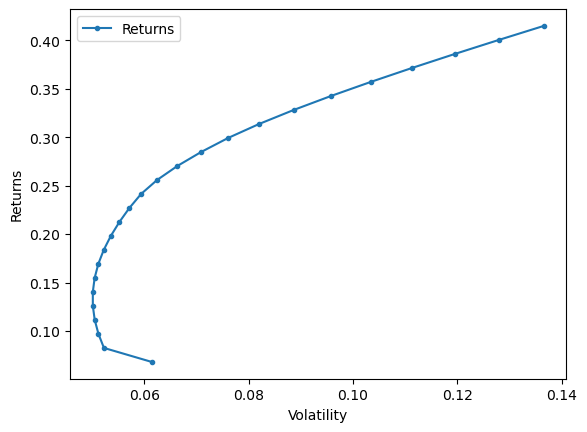

In [61]:
plot_ef(25,er[asset_list],cov.loc[asset_list,asset_list])

<Axes: xlabel='Volatility', ylabel='Returns'>

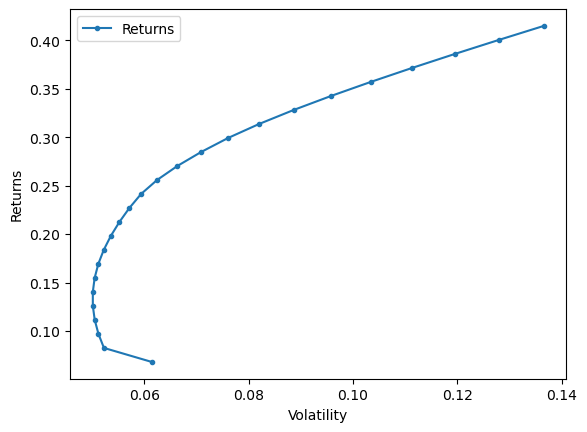

In [64]:
erk.plot_ef(25,er[asset_list],cov.loc[asset_list,asset_list])